In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
%pdb off

# import dask
# from dask.distributed import Client, LocalCluster
# cluster = LocalCluster()  # Launches a scheduler and workers locally
# client = Client(cluster)  # Connect to distributed cluster and override default
# dask.config.set(scheduler='threads')

from pyCascade import probePost, physics, utils
from matplotlib import pyplot as plt
import numpy as np
import os
from IPython.core.debugger import set_trace
import pandas as pd

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

u_bulk is 2.6803574256411156
domain height is 116.0
u_bulk is 2.6836620775473787
domain height is 116.0


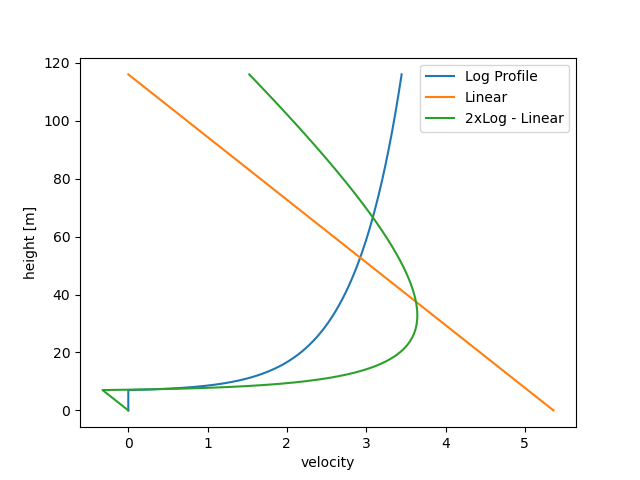

In [2]:
vK_const = .41
hm = 6
rho = 1.225
mu = 1.7894e-5
# Re_tau = 43300
# Lz =  24*hm*4/3/3
Lx = 348
Lz = Lx / 3
z_ref = 10 # really y_refj
U_ref = 2

z_0 = 0.061*hm #used for convention, but really y_0
disp = 1.11*hm
shear_vel = vK_const*U_ref/np.log(z_ref/z_0)

plt.figure()
LES_params = {
    'uStar': shear_vel,
    'z0': z_0,
    'disp': disp,
    'Dt': .01,
    'z_values' : np.linspace(0,Lz,10000)
}
physics_setup = physics.LES_Physics(LES_params)
physics_setup.plot_log_wind()

physics_setup.plot_spinup_velocity()
physics_setup.plot_spinup_velocity2()

plt.legend()

plt.show()

In [3]:
display(
    physics_setup.LES_params['uStar'], 
    physics_setup.LES_params['z0'], 
    physics_setup.LES_params['disp'], 
    physics_setup.LES_params['u_bulk'],
    physics_setup.LES_params['log_wind'][-1]
    )

0.24790587268977465

0.366

6.66

2.6836620775473787

3.4462448896341136

In [4]:
physics_setup.calc_flatplate_quantities(
    rho = 1.224,
    mu = 1.7894e-5,
    yPlus = 500
    )

U infinity is 3.4462448896341136 with L = 116.0
flat plate Reynolds number is 27345011.423371524
wall spacing is 0.06320970849578368 for y+ of 500


In [5]:
window_dim = hm/2/4

velocity_scaling = 1
ventilation_scaling = velocity_scaling/(window_dim**2)


In [6]:
# start = -25000#-250000
stop = -1000
by = 1
start = 100
# stop = 70000

# Run Specifics

In [7]:
category =  "config2"
run = 57

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut/pointCloud'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/pointCloud'


In [8]:
# probes = probePost.Probes(
#     probes_dir, 
#     probe_type = "POINTCLOUD_PROBES", 
#     file_type = "csv", 
#     directory_parquet = oak_probes_dir,
#     )

# probes.to_parquet(overwrite=True)

probes = probePost.Probes(
    oak_probes_dir, 
    probe_type = "POINTCLOUD_PROBES", 
    file_type = "parquet", 
    directory_parquet = oak_probes_dir,
)

In [9]:
probes.data[('zwindow_2-0_h_0--1',
  119000)].compute()


,"comp(u_avg,0)","comp(u_avg,2)",p_avg
0,0.778970,0.013080,0.198397
1,0.779361,0.012312,0.195504
2,0.782888,0.012131,0.192677
3,0.781167,0.013177,0.190699
4,0.785483,0.014142,0.188282
...,...,...,...
95,0.791942,0.018381,0.184882
96,0.797142,0.018594,0.182706
97,0.796341,0.018961,0.180064
98,0.801736,0.018888,0.176546
